In [10]:
import os
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [11]:
# unzipping the data
local_zip='horse-or-human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('horse-or-human')
zip_ref.close()

In [12]:
#define directories for human and horse training dataset
train_humam_dir=os.path.join('./horse-or-human/humans')
train_horse_dir=os.path.join('./horse-or-human/horses')

#lets look at the total human and horse images and their filenames
print('Training human images: ',len(os.listdir(train_humam_dir)))
print(os.listdir(train_humam_dir)[:5])

print('Training horse images: ',len(os.listdir(train_horse_dir)))
print(os.listdir(train_horse_dir)[:5])

Training human images:  527
['human17-22.png', 'human10-17.png', 'human10-03.png', 'human07-27.png', 'human09-22.png']
Training horse images:  500
['horse43-5.png', 'horse06-5.png', 'horse20-6.png', 'horse04-7.png', 'horse41-7.png']


RANDOM SAMPLE OF HORSE AND HUMAN IMAGES FROM THE DATASET: 


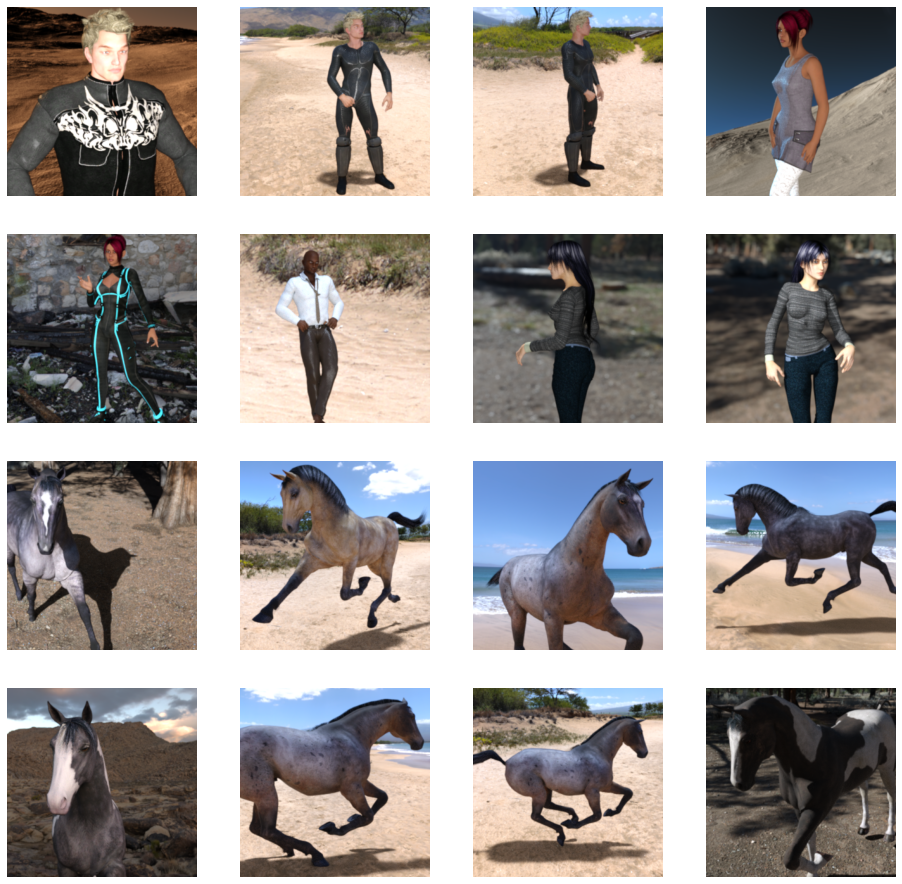

In [14]:
#lets take a look at some of the images:
nrow=4
ncol=4
fig=plt.gcf()
fig.set_size_inches(ncol*4,nrow*4)
index=8
next_human_pic=[os.path.join(train_humam_dir,fname)
                for fname in os.listdir(train_humam_dir)[0:index]]
next_horse_pic=[os.path.join(train_horse_dir,fname)
                for fname in os.listdir(train_horse_dir)[0:index]]

for i,img_path in enumerate(next_human_pic+next_horse_pic):
    sp=plt.subplot(nrow,ncol,i+1)
    sp.axis('Off')
    img=mpimg.imread(img_path)
    plt.imshow(img)
print("RANDOM SAMPLE OF HORSE AND HUMAN IMAGES FROM THE DATASET: ")
plt.show()

In [15]:
#Lets create the CNN model
model=tf.keras.Sequential([
    #first convolution:
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #flaten to DNN
    tf.keras.layers.Flatten(),
    #hidden layer with 512 neurons
    tf.keras.layers.Dense(512,activation='relu'),
    #output 1 neuron= 0(horses) or 1(humans)
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

2021-11-23 18:52:11.367382: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
# using binary_crossentropy loss, because it's a binary classification problem
# and our final activation is a sigmoid
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [59]:
#Data preprocessing
#adding labels using ImageGenerator
train_data_gen=ImageDataGenerator(rescale=1/255)# images re-scaled by 1/255
val_data_gen=ImageDataGenerator(rescale=1/255)
#Flow training images in batches of 128 using train_datagen generator
train_generator=train_data_gen.flow_from_directory(
                #source
                'horse-or-human/',
                target_size=(300,300),
                batch_size=120,
                class_mode='binary')
validation_generator=val_data_gen.flow_from_directory(
                        #source
                        'validation/',
                        target_size=(300,300),
                        batch_size=32,
                        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [61]:
#now lets train the model
# lets train for 10 epochs
history=model.fit(train_generator,steps_per_epoch=8,epochs=10,verbose=1,
                  validation_data=validation_generator, validation_steps=8)

Epoch 1/10
8/8 [==============================] - 33s 4s/step - loss: 5.7781e-07 - accuracy: 1.0000
Epoch 2/10
8/8 [==============================] - 38s 5s/step - loss: 6.1276e-07 - accuracy: 1.0000

Input Human Image:


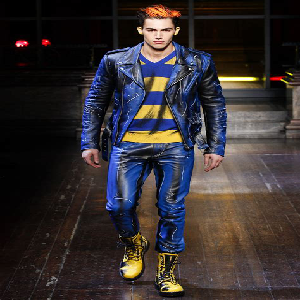

In [62]:
#Predicting Data:
#First lets try a human image
img=image.load_img('validation_single/human_test.jpeg',target_size=(300,300))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

print("Input Human Image:")
img

In [63]:
#To predict image:
classes=model.predict(x)
if classes>0.5:
    print("Image is a Human")
else:
    print("Image is a Horse")

Image is a Human


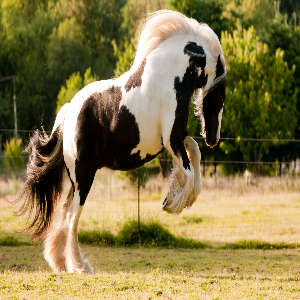

In [64]:
#similarly for horse:
img = image.load_img('validation_single/horse_test.jpeg', target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img

In [66]:
#To predict image:
classes=model.predict(x)
if classes>0.5:
    print("Image is a Human")
else:
    print("Image is a Horse")






Image is a Horse
